# 演習８　勾配降下法

## 課題
行列$A$およびベクトル$b$が既知のとき，以下の最小二乗法

$x^* = \arg\min_x ||Ax-b||_2^2$

を勾配降下法を用いて未知の$x^*$を求めるアルゴリズムを実装せよ．初期値は$x=(3,3)^\top$とし，勾配降下のステップサイズは$\tau=0.1$とする．


## 追加課題
余裕のあるものは，反復ごとの$x_1, x_2$を保存しておいて，反復によるこれらの変数の変化をグラフにせよ．さらに，$\tau$を変えてこのグラフがどうなるか観察せよ．

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = np.c_[np.asarray([21.3, 22, 26.9, 32.3, 33.1, 38.2])/100]
b = np.c_[np.asarray([116.5, 125.5, 128.1, 132, 141, 145.2])/100]
A = np.concatenate([np.ones([6,1]), a], axis=1)

ATA = np.matmul(A.T, A)
ATb = np.matmul(A.T, b)
# ソルバで解いた解x(デバッグ用)
tx = np.linalg.solve(ATA, ATb)
print(tx)

tau = 0.1 #勾配降下のステップサイズ
Niter = 5000 # 反復回数

# xの初期値
x = np.c_[np.asarray([3, 3])]


[[0.88743422]
 [1.47203377]]


In [7]:
x

array([[3],
       [3]])

In [5]:
b

array([[1.165],
       [1.255],
       [1.281],
       [1.32 ],
       [1.41 ],
       [1.452]])

In [10]:
def GD(A,b,ini_x,tau,Niter):
    xs=[[],[]]
    f=lambda x:np.linalg.norm(A@x-b,ord=2)**2
    df=lambda x: 2*(A@x-b).T@A
    x=ini_x
    for i in range(Niter):
        xs[0].append(x[0,0])
        xs[1].append(x[1,0])
        x=x-tau*df(x).T
    return xs,x

In [13]:
xs,answer=GD(A,b,x,tau,Niter)
print(f"The answer is \n{answer}")

The answer is 
[[0.88743422]
 [1.47203377]]


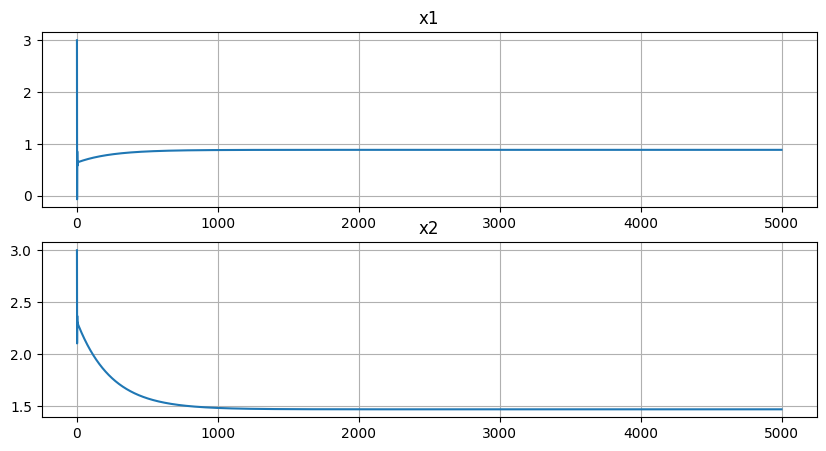

In [22]:
fig,ax=plt.subplots(2,figsize=(10,5))
for i in range(2):
    ax[i].plot(xs[i])
    ax[i].set_title(f"x{i+1}")
    ax[i].grid()

/var/folders/m5/gny_pn5x2_325myvmn9qlbqr0000gn/T/ipykernel_94499/1354994989.py:4: RuntimeWarning: overflow encountered in matmul
  df=lambda x: 2*(A@x-b).T@A
/var/folders/m5/gny_pn5x2_325myvmn9qlbqr0000gn/T/ipykernel_94499/1354994989.py:9: RuntimeWarning: invalid value encountered in subtract
  x=x-tau*df(x).T


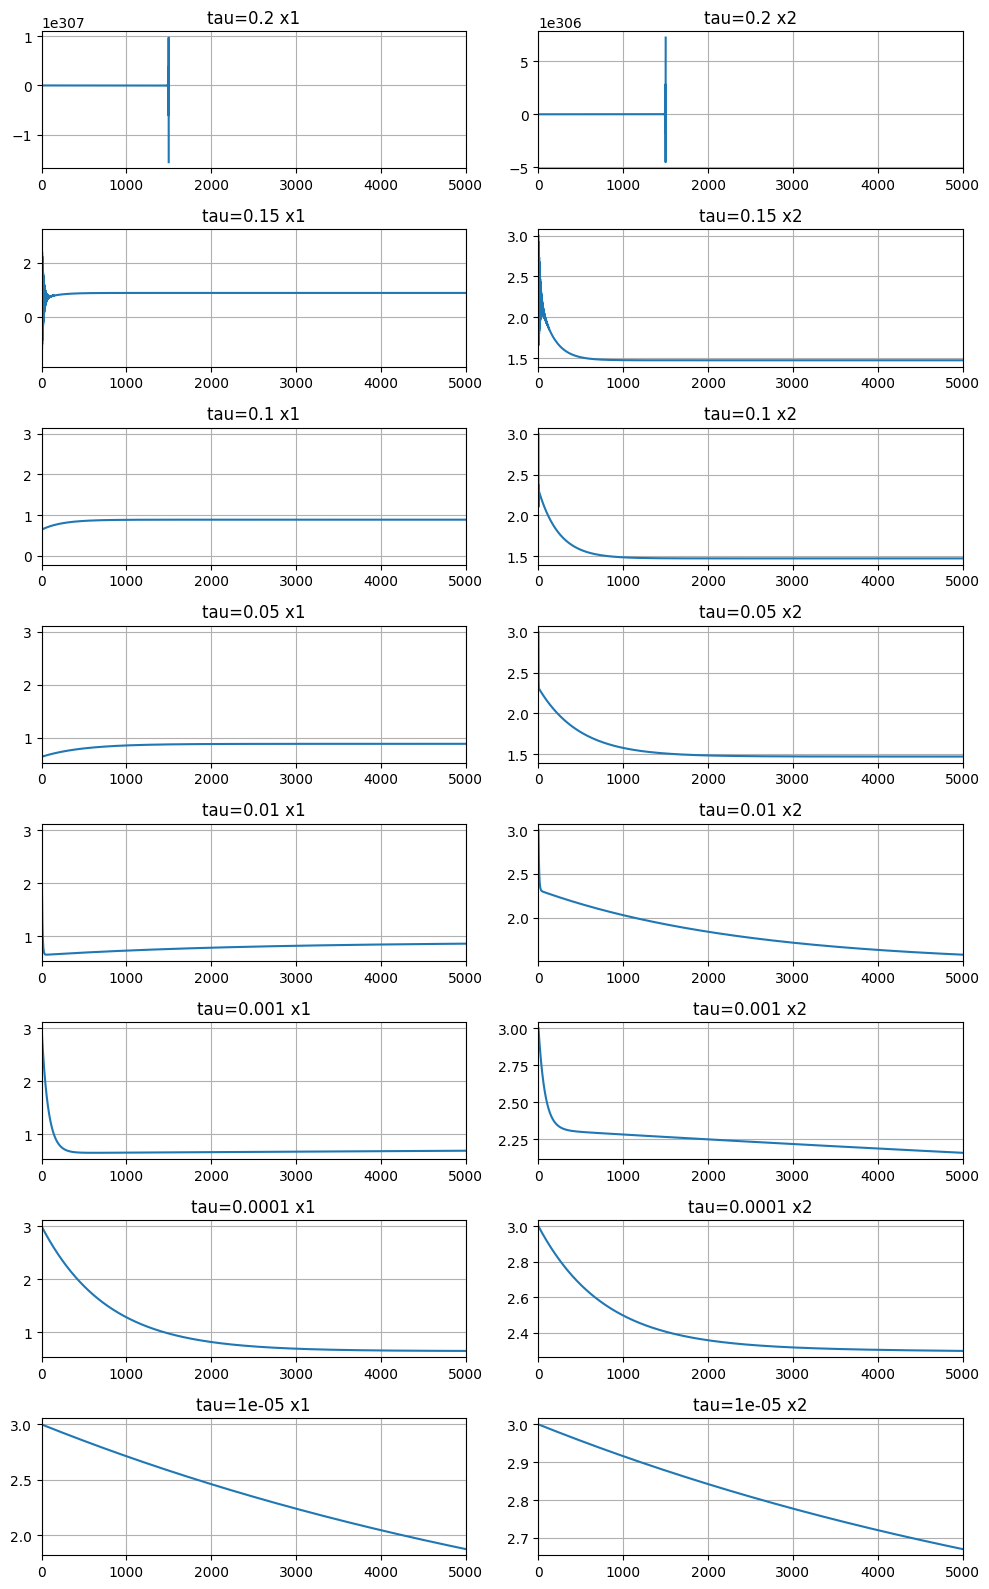

In [32]:
from sre_parse import fix_flags


taus=[0.2,0.15,0.1,0.05,0.01,0.001,0.0001,0.00001]
fig,ax=plt.subplots(len(taus),2,figsize=(10,2*len(taus)))
for i,tau in enumerate(taus):
    xs,_=GD(A,b,x,tau,Niter)
    for j in range(2):
        ax[i,j].plot(xs[j])
        ax[i,j].set_title(f"tau={tau} x{j+1}")
        ax[i,j].grid()
        ax[i,j].set_xlim(0,5000)
plt.tight_layout()

tau=0.2の場合勾配が発散してしまった。
tauを減らすと緩やかになっていく。